In [1]:
# Load the data
import pandas as pd
X = pd.read_csv('../data/tree_class_feats.csv')
y = pd.read_csv('../data/tree_class_target.csv')

# Split the dataset into training set and test set with a 80-20 ratio
from sklearn.model_selection import train_test_split
seed = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [2]:
# Define your model 
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
from tensorflow import random

notebook = __name__ == '__main__'
np.random.seed(seed)
random.set_seed(seed)

model_1 = Sequential()
model_1.add(Dense(16, activation='relu', input_dim=X_train.shape[1]))
model_1.add(Dense(8, activation='relu'))
model_1.add(Dense(4, activation='relu'))
model_1.add(Dense(1, activation='sigmoid'))

# Choose the loss function to be binary cross entropy and the optimizer to be SGD for training the model
model_1.compile(optimizer='sgd', loss='binary_crossentropy')
# train the model
history = model_1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=300, batch_size=50, verbose=0)

Using TensorFlow backend.


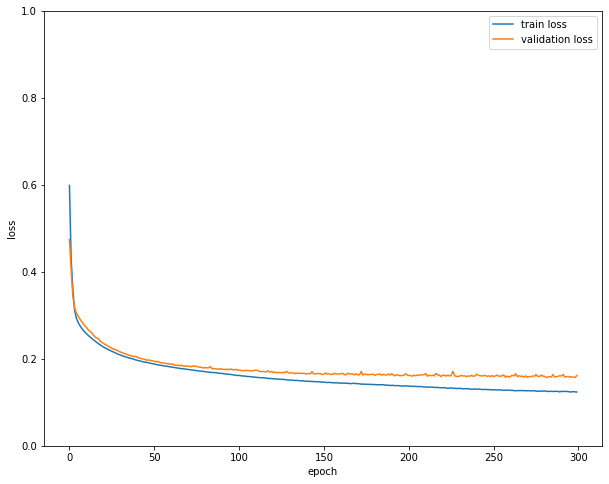

In [3]:
if notebook:
    # import require packages for plotting
    import matplotlib.pyplot as plt 
    import matplotlib
    %matplotlib inline 

    # plot training error and validation error
    matplotlib.rcParams['figure.figsize'] = (10.0, 8.0) 
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylim(0,1)
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train loss', 'validation loss'], loc='upper right')

In [4]:
#Define your model with early stopping on test error
from keras.callbacks import EarlyStopping
np.random.seed(seed)
random.set_seed(seed)

model_2 = Sequential()
model_2.add(Dense(16, activation='relu', input_dim=X_train.shape[1]))
model_2.add(Dense(8, activation='relu'))
model_2.add(Dense(4, activation='relu'))
model_2.add(Dense(1, activation='sigmoid'))
# Choose the loss function to be binary cross entropy and the optimizer to be SGD for training the model
model_2.compile(optimizer='sgd', loss='binary_crossentropy')
# define the early stopping callback
es_callback = EarlyStopping(monitor='val_loss', mode='min')
# train the model
history=model_2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=300, batch_size=50, callbacks=[es_callback], verbose=0)

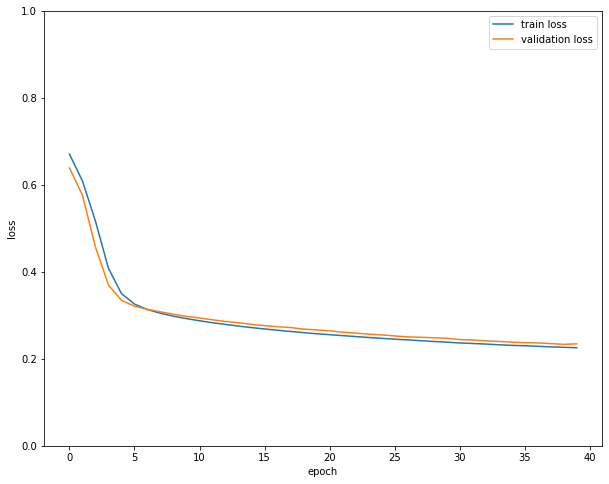

In [5]:
if notebook:
    # plot training error and test error
    matplotlib.rcParams['figure.figsize'] = (10.0, 8.0) 
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylim(0,1)
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train loss', 'validation loss'], loc='upper right')

In [6]:
#Define your model with early stopping on test error with patience=10
from keras.callbacks import EarlyStopping
np.random.seed(seed)
random.set_seed(seed)

model_3 = Sequential()
model_3.add(Dense(16, activation='relu', input_dim=X_train.shape[1]))
model_3.add(Dense(8, activation='relu'))
model_3.add(Dense(4, activation='relu'))
model_3.add(Dense(1, activation='sigmoid'))
# Choose the loss function to be binary cross entropy and the optimizer to be SGD for training the model
model_3.compile(optimizer='sgd', loss='binary_crossentropy')
# define the early stopping callback
es_callback = EarlyStopping(monitor='val_loss', mode='min', patience=10)
# train the model
history=model_3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=300, batch_size=50, callbacks=[es_callback], verbose=0)

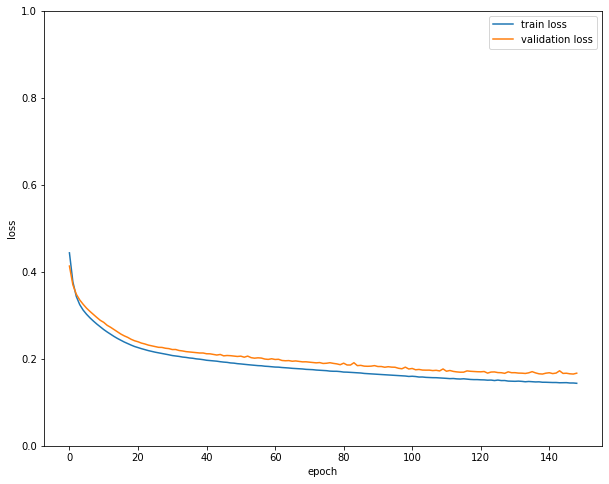

In [7]:
if notebook:
    # plot training error and test error
    matplotlib.rcParams['figure.figsize'] = (10.0, 8.0) 
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylim(0,1)
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train loss', 'validation loss'], loc='upper right')